In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-price/Medical Price Dataset.csv


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:

df = pd.read_csv('/kaggle/input/medical-price/Medical Price Dataset.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

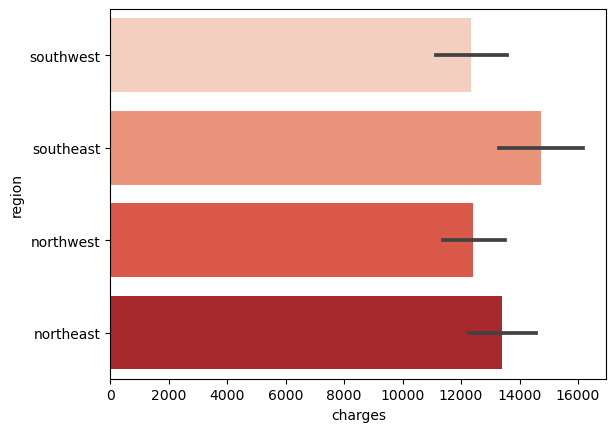

In [8]:

charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1)
ax = sns.barplot(x='charges', y='region', data=df, palette='Reds')


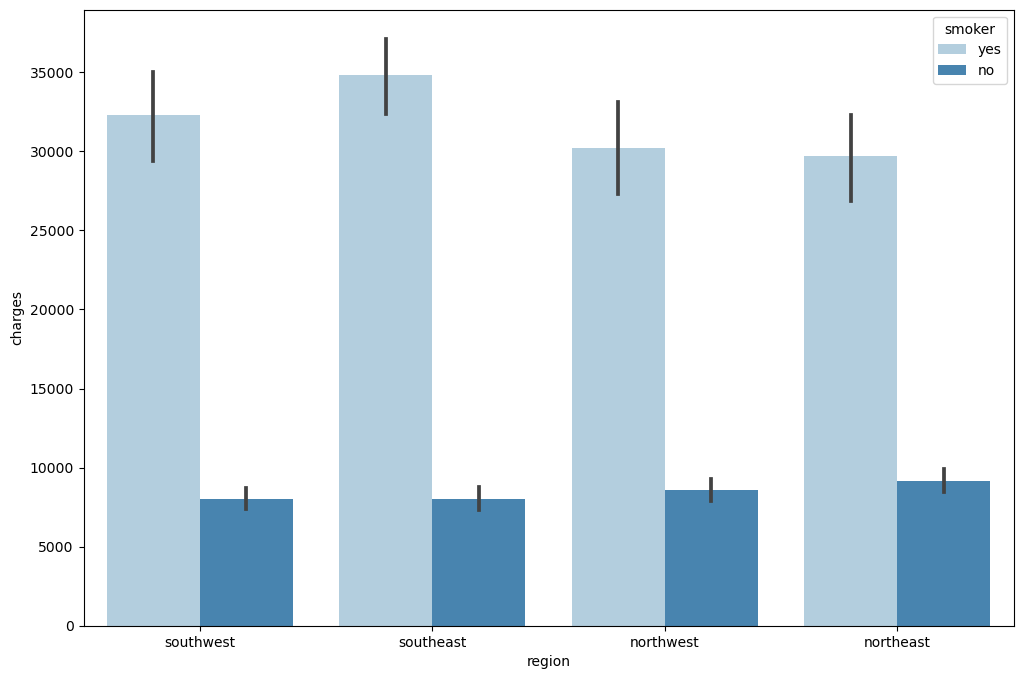

In [9]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(y='charges', x='region', data=df, hue='smoker', palette='Blues')


Clearly, smokers tend to have higher medical costs

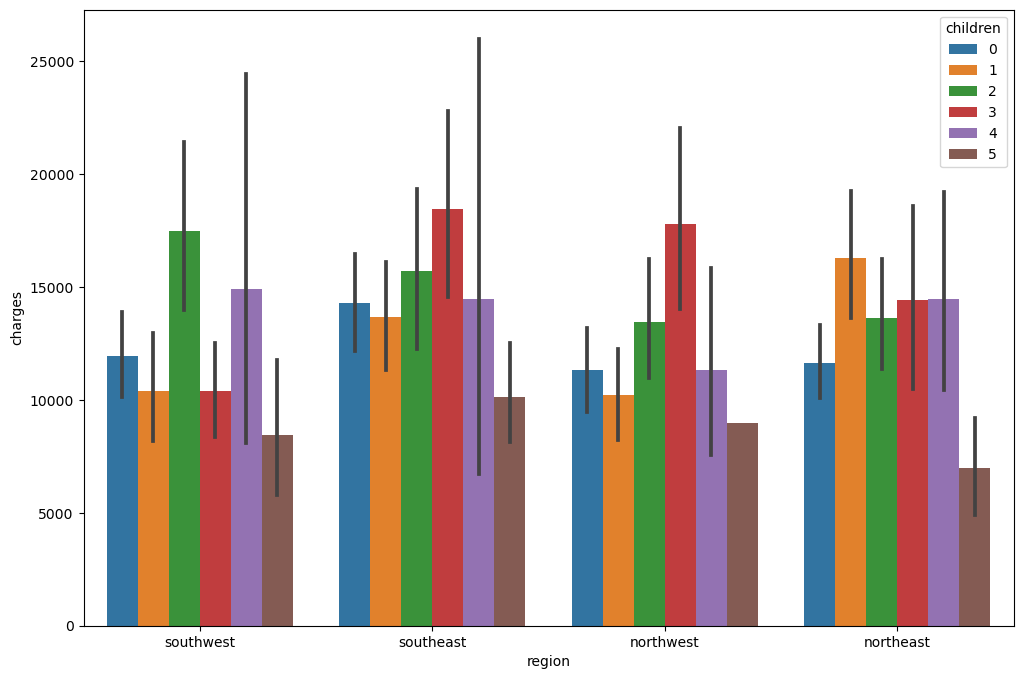

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df)

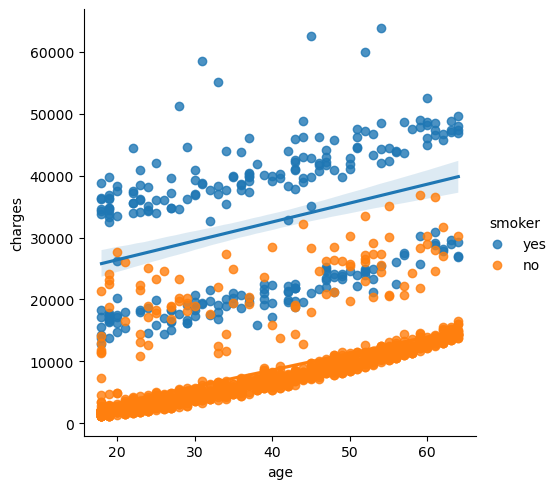

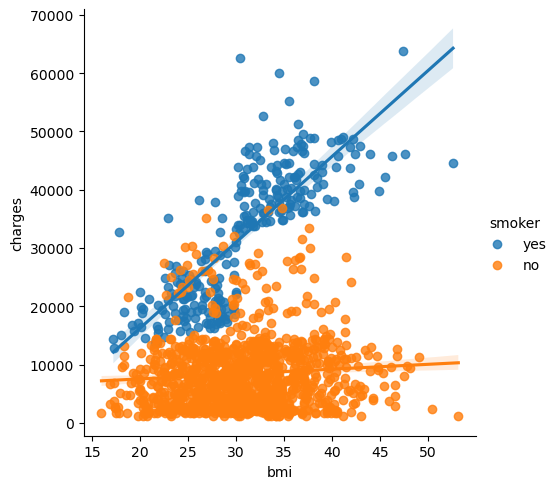

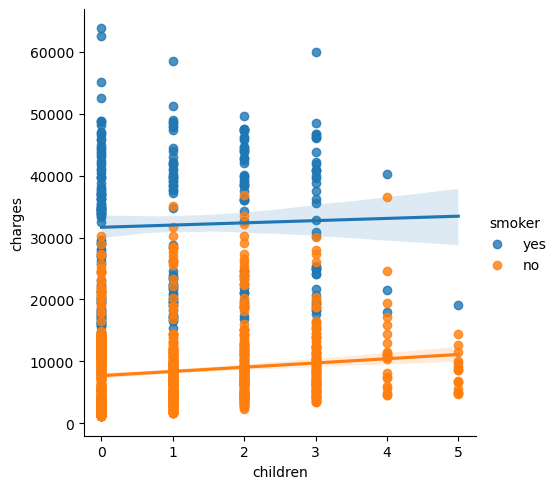

In [11]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

Medical costs increase with age, bmi, and #children, also people with children are mostly non-smokers

In [12]:
df['age'] = pd.qcut(df['age'], 10, labels=False, duplicates='drop')


In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,0,female,27.900,0,yes,southwest,16884.92400
1,0,male,33.770,1,no,southeast,1725.55230
2,2,male,33.000,3,no,southeast,4449.46200
3,3,male,22.705,0,no,northwest,21984.47061
4,3,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,7,male,30.970,3,no,northwest,10600.54830
1334,0,female,31.920,0,no,northeast,2205.98080
1335,0,female,36.850,0,no,southeast,1629.83350
1336,1,female,25.800,0,no,southwest,2007.94500


In [15]:
import pandas as pd 

shuffle_df = df.sample(frac=1)

train_size = int(0.7 * len(df))

train = shuffle_df[:train_size]
test = shuffle_df[train_size:]

In [17]:
test.head()

,age,sex,bmi,children,smoker,region,charges
419,9,female,26.98,0,yes,northwest,28950.46920
328,9,female,33.80,1,yes,southwest,47928.03000
549,5,female,46.20,0,yes,southeast,45863.20500
1164,5,female,28.31,1,no,northwest,7153.55390
525,0,female,33.88,0,no,southeast,11482.63485


In [18]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target = 'charges'

df = df[features + [target]]
#Categorical values need  transformed into numeric.
df['sex'] = df['sex'].replace(["female", "male"], [0, 1])
df['region'] = df['region'].replace(['northeast', 'northwest', 'southeast','southwest'], [1, 2, 3,4])
df['smoker'] = df['smoker'].replace(["no", "yes"], [0, 1])


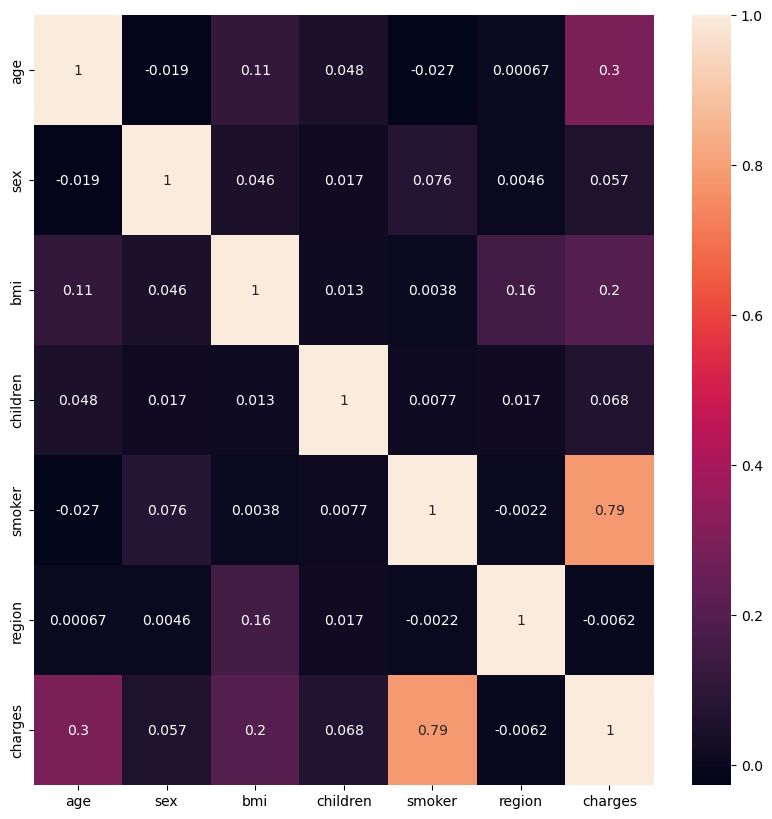

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)


Only smoking has highest correlation with charges

In [40]:
import pandas as pd 
#test-train split
shuffle_df = df.sample(frac=1)

train_size = int(0.7 * len(df))

train1 = shuffle_df[:train_size]
test1 = shuffle_df[train_size:]

In [41]:
train1

,age,sex,bmi,children,smoker,region,charges
407,6,0,23.600,1,0,4,8539.67100
946,5,1,35.800,2,0,4,7160.09400
166,1,0,37.000,5,0,4,4830.63000
826,8,1,31.790,2,1,3,43813.86610
1202,1,1,32.110,0,0,2,2055.32490
...,...,...,...,...,...,...,...
91,7,0,24.795,1,0,2,10942.13205
329,7,1,36.700,0,0,4,9144.56500
289,7,1,26.400,3,0,3,25992.82104
787,1,1,36.860,0,0,2,1917.31840


In [42]:
y= train1['charges']
y

407      8539.67100
946      7160.09400
166      4830.63000
826     43813.86610
1202     2055.32490
           ...     
91      10942.13205
329      9144.56500
289     25992.82104
787      1917.31840
440      4738.26820
Name: charges, Length: 936, dtype: float64

In [43]:
x=train1.drop(['charges'], axis=1)
x

,age,sex,bmi,children,smoker,region
407,6,0,23.600,1,0,4
946,5,1,35.800,2,0,4
166,1,0,37.000,5,0,4
826,8,1,31.790,2,1,3
1202,1,1,32.110,0,0,2
...,...,...,...,...,...,...
91,7,0,24.795,1,0,2
329,7,1,36.700,0,0,4
289,7,1,26.400,3,0,3
787,1,1,36.860,0,0,2


In [44]:
test1

,age,sex,bmi,children,smoker,region,charges
941,7,0,46.090,1,0,3,9549.56510
790,4,0,41.800,0,0,3,5662.22500
397,1,1,31.020,0,0,3,16586.49771
216,7,0,26.600,0,0,2,10355.64100
536,3,0,38.900,3,0,4,5972.37800
...,...,...,...,...,...,...,...
924,5,1,23.200,0,0,4,6250.43500
827,4,1,28.025,1,1,1,20773.62775
333,8,0,28.785,0,0,1,11658.37915
1331,1,0,33.400,0,0,4,10795.93733


In [45]:
x_pred= train1.drop(['charges'], axis=1)
x_pred

,age,sex,bmi,children,smoker,region
407,6,0,23.600,1,0,4
946,5,1,35.800,2,0,4
166,1,0,37.000,5,0,4
826,8,1,31.790,2,1,3
1202,1,1,32.110,0,0,2
...,...,...,...,...,...,...
91,7,0,24.795,1,0,2
329,7,1,36.700,0,0,4
289,7,1,26.400,3,0,3
787,1,1,36.860,0,0,2


In [46]:
y_test=test1['charges']

In [47]:
y_test

941      9549.56510
790      5662.22500
397     16586.49771
216     10355.64100
536      5972.37800
           ...     
924      6250.43500
827     20773.62775
333     11658.37915
1331    10795.93733
33      13770.09790
Name: charges, Length: 402, dtype: float64

In [52]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
   
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
    
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
      
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b
     
  

  
def main() :
      
    model = LinearRegression( iterations = 10000, learning_rate = 0.01 )
  
    model.fit( x, y )
      
    
  
    Y_pred = model.predict( x_pred )
      
    print( "Predicted values ", np.round( Y_pred[:1], 2 ) ) 
      
    print( "Real values      ", y_test[:1] )
      
if __name__ == "__main__" : 
      
    main()

Predicted values  407   NaN
dtype: float64
Real values       941    9549.5651
Name: charges, dtype: float64
